Enter number of pipes:  6


Enter pipe info like: A B 5


Pipe #1:  A B 2
Pipe #2:  A C 4
Pipe #3:  B D 7
Pipe #4:  C D 1
Pipe #5:  C E 3
Pipe #6:  D E 2



Enter coordinates for each junction (x y):


A:  0 0
B:  2 2
C:  2 -2
D:  5 0
E:  7 -2
Start junction:  A
Goal junction:  E



Rat starts at A, wants to reach E



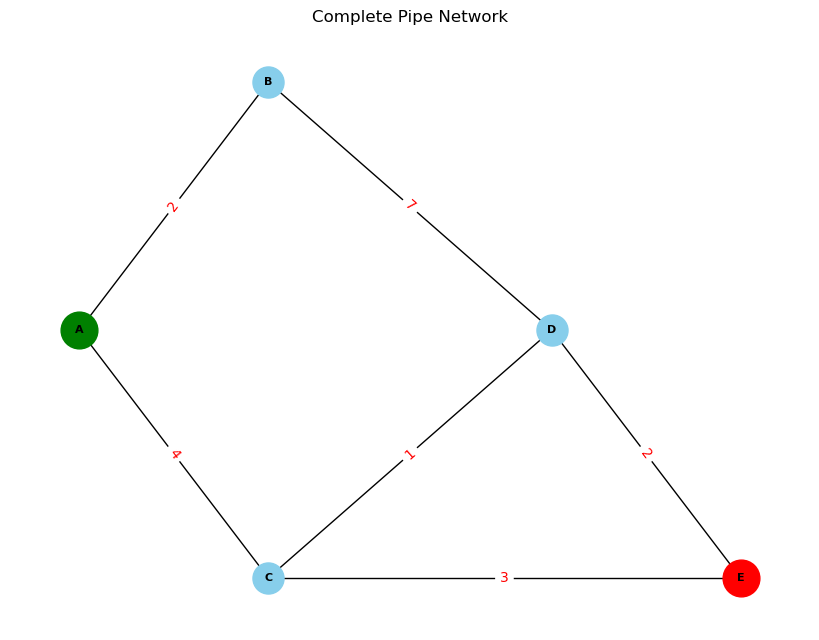


--- DFS ---
Path: A -> B -> D -> C -> E
Cost: 13.0
Visited nodes: 5


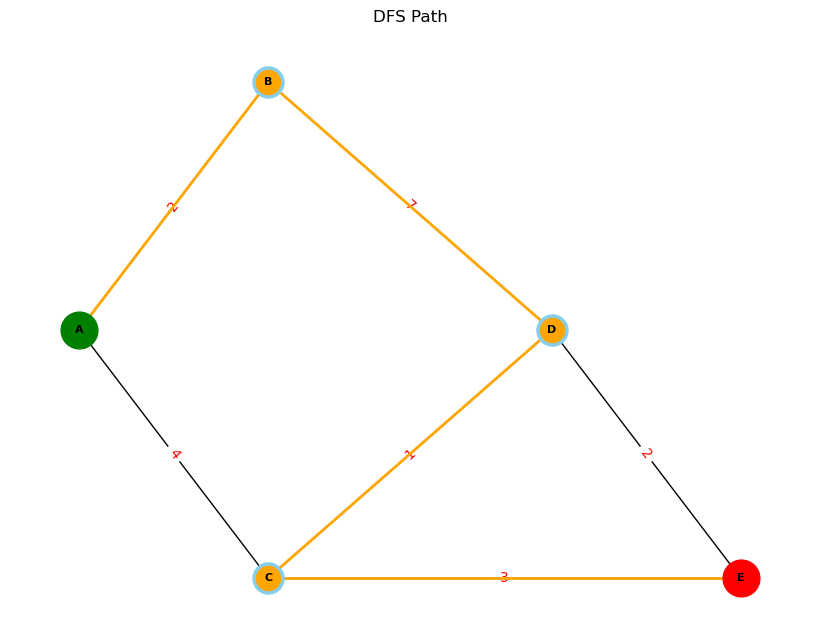


--- BFS ---
Path: A -> C -> E
Cost: 7.0
Visited nodes: 5


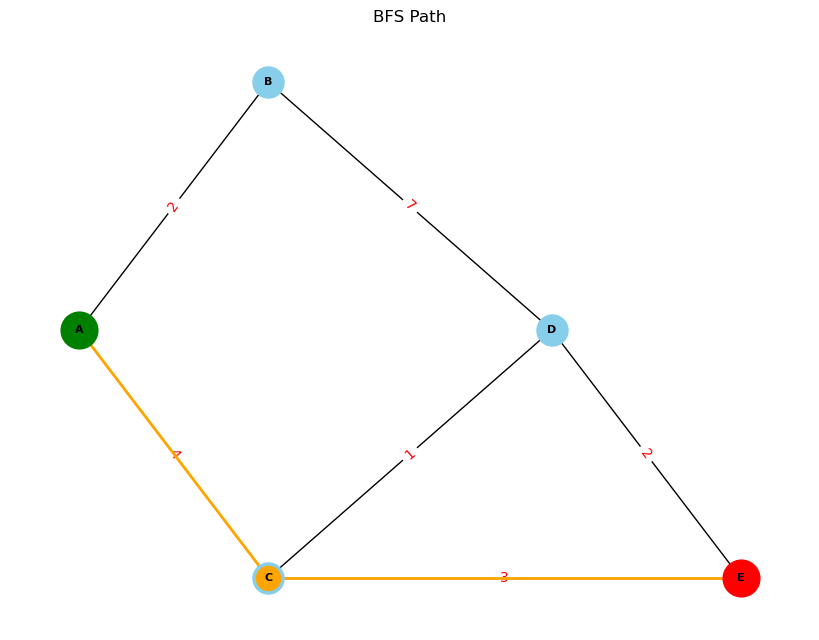


--- Dijkstra ---
Path: A -> C -> D -> E
Cost: 7.0
Visited nodes: 5


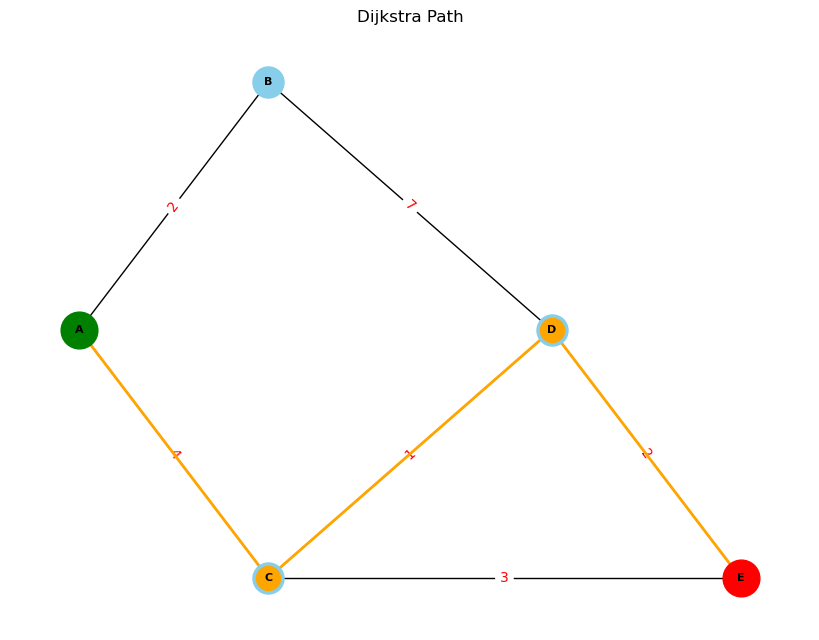


--- A* ---
Path: A -> C -> E
Cost: 7.0
Visited nodes: 4


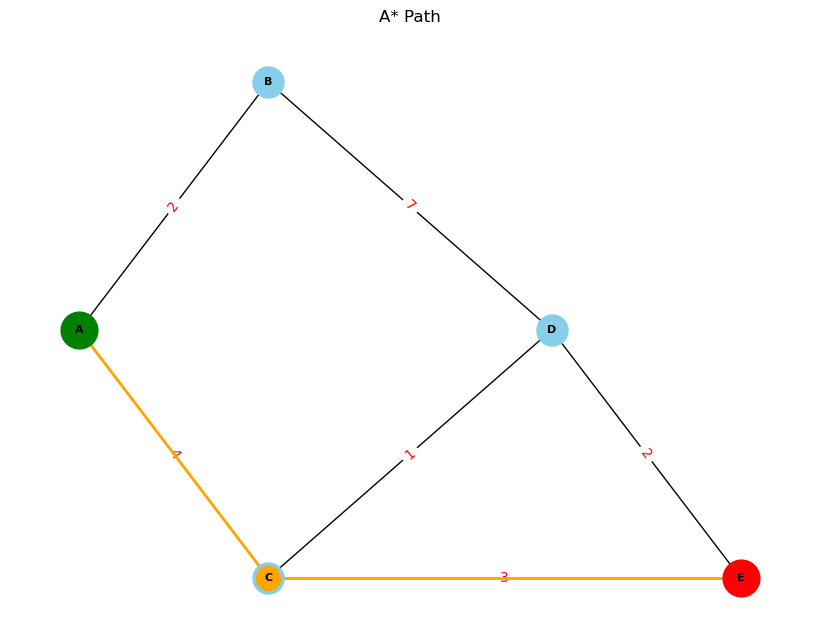

In [3]:
import heapq
import math
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

# Heuristic for A* 
def heuristic(n1, n2, coords):
    x1, y1 = coords.get(n1, (0, 0))
    x2, y2 = coords.get(n2, (0, 0))
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

#  DFS
def dfs(graph, start, goal):
    stack = [(start, [start], 0)]   # (node, path, cost)
    visited = set()
    order = []

    while stack:
        node, path, cost = stack.pop()
        if node not in visited:
            visited.add(node)
            order.append(node)

            if node == goal:
                return path, cost, len(visited), order

            for neigh, w in sorted(graph.get(node, []), reverse=True):
                if neigh not in visited:
                    stack.append((neigh, path + [neigh], cost + w))
    return None, float('inf'), len(visited), order

# BFS
def bfs(graph, start, goal):
    q = deque([(start, [start], 0)])
    visited = {start}
    order = [start]

    while q:
        node, path, cost = q.popleft()
        if node == goal:
            return path, cost, len(visited), order

        for neigh, w in sorted(graph.get(node, [])):
            if neigh not in visited:
                visited.add(neigh)
                order.append(neigh)
                q.append((neigh, path + [neigh], cost + w))
    return None, float('inf'), len(visited), order

# Dijkstra
def dijkstra(graph, start, goal):
    pq = [(0, start, [start])]   # (cost, node, path)
    visited = {}
    order = set()

    while pq:
        cost, node, path = heapq.heappop(pq)
        if node not in order:
            order.add(node)

        if node in visited and visited[node] < cost:
            continue
        visited[node] = cost

        if node == goal:
            return path, cost, len(order), list(order)

        for neigh, w in graph.get(node, []):
            new_cost = cost + w
            if neigh not in visited or visited[neigh] > new_cost:
                heapq.heappush(pq, (new_cost, neigh, path + [neigh]))
    return None, float('inf'), len(order), list(order)

# A
def a_star(graph, start, goal, coords):
    pq = [(heuristic(start, goal, coords), 0, start, [start])]
    visited = {}
    order = set()

    while pq:
        f, g, node, path = heapq.heappop(pq)
        if node not in order:
            order.add(node)

        if node in visited and visited[node] <= g:
            continue
        visited[node] = g

        if node == goal:
            return path, g, len(order), list(order)

        for neigh, w in graph.get(node, []):
            new_g = g + w
            if neigh not in visited or visited[neigh] > new_g:
                heapq.heappush(pq, (new_g + heuristic(neigh, goal, coords),
                                    new_g, neigh, path + [neigh]))
    return None, float('inf'), len(order), list(order)

# Drawing Graph (Fixed)
def draw_graph(graph, coords, start, goal, path=None, title="Pipe Network"):
    G = nx.Graph()
    edge_labels = {}

    for node, neighbours in graph.items():
        for neigh, w in neighbours:
            # only add edge once (avoid A-B and B-A duplicates)
            if not G.has_edge(node, neigh):
                G.add_edge(node, neigh, weight=w)
                edge_labels[(node, neigh)] = str(int(w))

    plt.figure(figsize=(8, 6))
    nx.draw(G, coords, with_labels=True, node_color='skyblue',
            node_size=500, font_size=8, font_weight="bold")
    nx.draw_networkx_edge_labels(G, coords, edge_labels=edge_labels, font_color='red')

    if path:
        nx.draw_networkx_nodes(G, coords, nodelist=path, node_color='orange')
        nx.draw_networkx_edges(G, coords, edgelist=list(zip(path, path[1:])),
                               edge_color='orange', width=2)

    nx.draw_networkx_nodes(G, coords, nodelist=[start], node_color='green', node_size=700)
    nx.draw_networkx_nodes(G, coords, nodelist=[goal], node_color='red', node_size=700)

    plt.title(title)
    plt.show(block=False)
    plt.pause(1)

#  Manual Input 
def take_input():
    graph = {}
    coords = {}

    n = int(input("Enter number of pipes: "))

    print("Enter pipe info like: A B 5")
    for i in range(n):
        while True:
            try:
                a, b, cost = input(f"Pipe #{i+1}: ").split()
                cost = float(cost)
                if cost <= 0:
                    print("Cost must be > 0")
                    continue
                graph.setdefault(a, []).append((b, cost))
                graph.setdefault(b, []).append((a, cost))
                break
            except:
                print("Wrong format! Example: A B 5")

    print("\nEnter coordinates for each junction (x y):")
    for j in graph.keys():
        x, y = map(float, input(f"{j}: ").split())
        coords[j] = (x, y)

    while True:
        s = input("Start junction: ")
        if s in graph:
            break
        print("Not found, try again.")

    while True:
        g = input("Goal junction: ")
        if g in graph:
            break
        print("Not found, try again.")

    return graph, coords, s, g

#  Main 
if __name__ == "__main__":
    graph, coords, start, goal = take_input()

    print(f"\nRat starts at {start}, wants to reach {goal}\n")

    results = {
        "DFS": dfs(graph, start, goal),
        "BFS": bfs(graph, start, goal),
        "Dijkstra": dijkstra(graph, start, goal),
        "A*": a_star(graph, start, goal, coords)
    }

    draw_graph(graph, coords, start, goal, title="Complete Pipe Network")

    for algo, (path, cost, visited, order) in results.items():
        print(f"\n--- {algo} ---")
        if path:
            print("Path:", " -> ".join(path))
            print("Cost:", cost)
            print("Visited nodes:", visited)
            draw_graph(graph, coords, start, goal, path, title=f"{algo} Path")
        else:
            print("No path found")
    plt.show()